In [1]:
%load_ext autoreload
%autoreload 0
import sys
#sys.path.append('/usr/lib/python3.4/site-packages')
import matplotlib
%matplotlib inline
#matplotlib.use('TkAgg')
import BPV
import pattern_manipulation as pm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
df = BPV.Data()
df.read_csv("p.delviva.csv",False)
df.df.sort_index(by="p",inplace=True,ascending=True)
df.df.set_index(pd.Index([j for j in range(len(df.df))]), inplace=True)
tot_entropy = df.df['plog1onp'].sum()
print("tot entropy: ", tot_entropy)

N=50
W=0.05
prbl_heur = BPV.BPV("heuristic",df,N,W,time_solver=False)
prbl_heur.solve()
#cProfile.run('prbl.solve()',sort=1)
prbl_heur.pprint_solution()

tot entropy:  1.52743150512

Solver =  heuristic 
Entropy =  0.323043576476 
Cardinality =  39 
Rate =  0.0486692968384


In [7]:
prbl_heur.solution_entropy/tot_entropy

0.21149464011487373

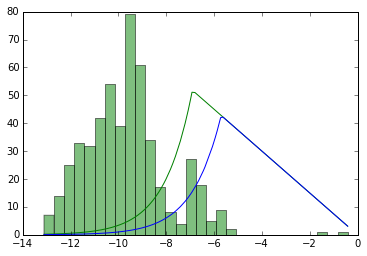

In [42]:
def heuristic(x,N,W):
    num = -x*np.log(x)
    den = max(1/N, x/W)
    return(num/den)

ax = plt.gca()
ax.set_yscale('linear')

p = df.df['p']
step = 1/len(p)
prange = np.arange(0,1,step)
logrange = np.log(p)

scaleheur = 150
f1 = []
f2 = []
for x in p:
    f1.append(scaleheur*heuristic(x,50,0.05))
    f2.append(scaleheur*heuristic(x,15,0.05))


plt.plot(logrange, f1, 'g')
plt.plot(logrange, f2,'b')
#plt.plot(prbl_heur.heuristic_cost)
plt.hist(logrange, 30, facecolor='green', alpha=0.5)

plt.show()